# Full Data Analysis of Heart Disease Prediction



### PART 1 and 2: Importing and Cleaning Up Data


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


* Import the necessary libraries: pandas for data manipulation,seaborn and matplotlib for graphical analysis


In [44]:
df=pd.read_csv('heart.csv')
df.head()
df.info()
print(df.describe())
df.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB
              Age         Sex      RestBP        Chol         Fbs     RestECG  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

* Displayed data using head, info,describe,duplicaated functions.<br>
* As we can see from the data, there are no duplicates, but there is two rows with missing Thal cells.<br>
* Since the two rows make up less than one percent of data, deleting entire rows will be inconsequential, so its faster and easier to delete the missing rows.
* We can also identify extreme outliers in Chol(565 mg/L vs 242 mg/L 50th prcentile), and Rest Bp (200 vs 130 50th percentile)

* Clean up data and remove incomplete information

In [45]:
df=df.dropna()

### PART 3 Exploratory Data Analysis (EDA)


#### 1.Checking  the distribution of 'age', 'cholesterol', and 'restbps' (resting blood pressure) using Univariate Analysis.<BR>


Text(0.5, 0, 'Age')

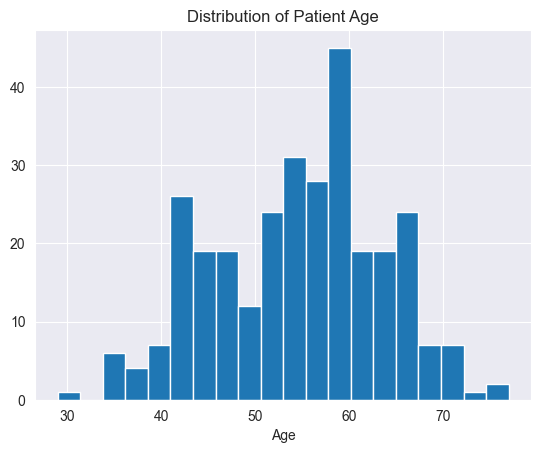

In [46]:
plt.hist(df['Age'],bins=20)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')

* used a histogram to display information about the age of the patients, as we can see the median age is 57.5-60

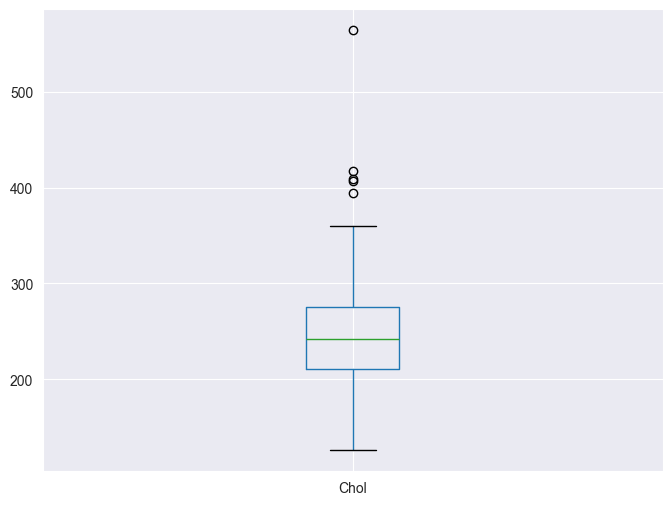

In [47]:
df.boxplot(column='Chol',figsize=(8,6))
plt.show()

* Used a boxplot to show data about cholesterol, as we can see the mean cholesterol level is around 250 mg/dL

### Male vs Female

<Axes: xlabel='Sex'>

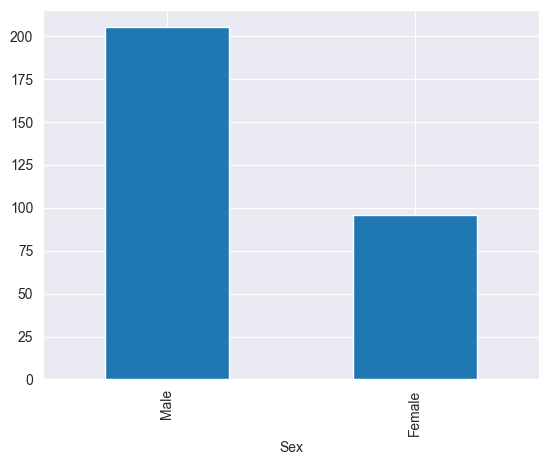

In [48]:
sex_labels = df['Sex'].map({0: 'Female', 1: 'Male'})
sex_counts=sex_labels.value_counts()
sex_counts.plot(kind='bar')

* We can see that from the 302 people sample, there is 200 male participants vs about 100 female participants, a considerable difference between numbers of males and females.

### Heart Disease vs No Heart Disease

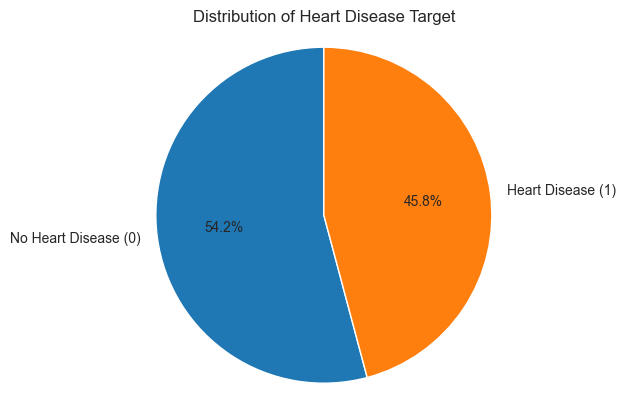

In [49]:
target_counts = df['Target'].value_counts()
target_labels = target_counts.index.map({0: 'No Heart Disease (0)', 1: 'Heart Disease (1)'})
plt.pie(
    target_counts,
    labels=target_labels,
    autopct='%1.1f%%',
    startangle=90,)
plt.title('Distribution of Heart Disease Target')
plt.axis('equal')
plt.show()

* We can see a moderate imbalance in the class balance of the targets(54.2% vs 45.8% from pie chart)

Text(0.5, 0, 'RestBP')

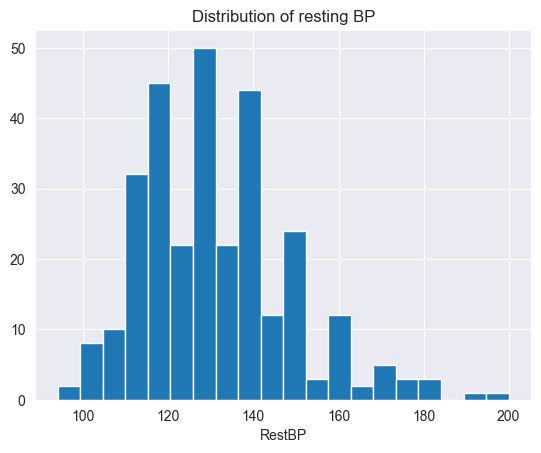

In [50]:
plt.hist(df['RestBP'],bins=20)
plt.title('Distribution of resting BP')
plt.xlabel('RestBP')

### Bivariate Analysis:

#### Age vs Cholestrol Correlation:

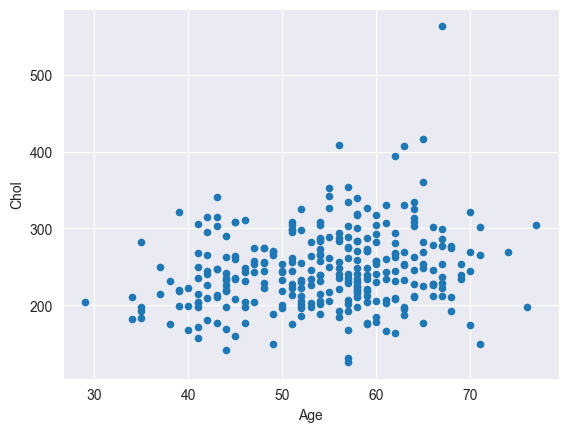

In [51]:
df.plot.scatter(x='Age',y='Chol')

plt.show()

* We can see that cholestrol level and age are not highly correlative and along the ages cholestrol level doesbt change much.
* We can identify an outlier at (67,565) but that is insignificant for our analysis.

#### Male vs Female resting Bp:

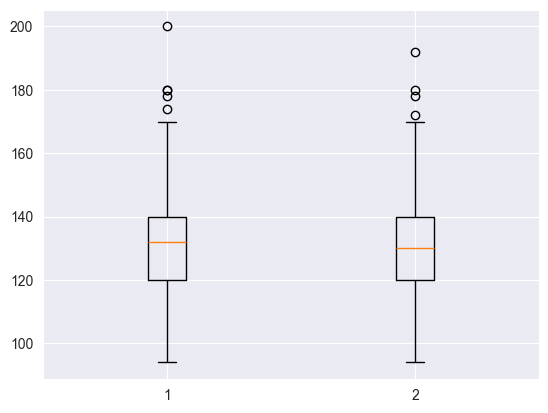

In [52]:
female_bp = df[sex_labels == 'Female']['RestBP']
male_bp = df[sex_labels == 'Male']['RestBP']
plt.boxplot([female_bp, male_bp])
plt.show()
numeric_cols = df.select_dtypes(include=np.number).columns

mask = df[numeric_cols].apply(lambda x: np.abs(stats.zscore(x)) < 3).all(axis=1)
df = df[mask]

* The resting heart rate of males and females are similar and we can see  slightly higher median for males (130 vs 135) and a higher range.
* We can see that maximum and minumum for males and females is similar.
* We can see an extreme outlier for male at 200 and 3 others at Bp higher than maximum range and als Extreme outlier at 193 for Females and 3 others above the maximum range

### Correlation Matrix:

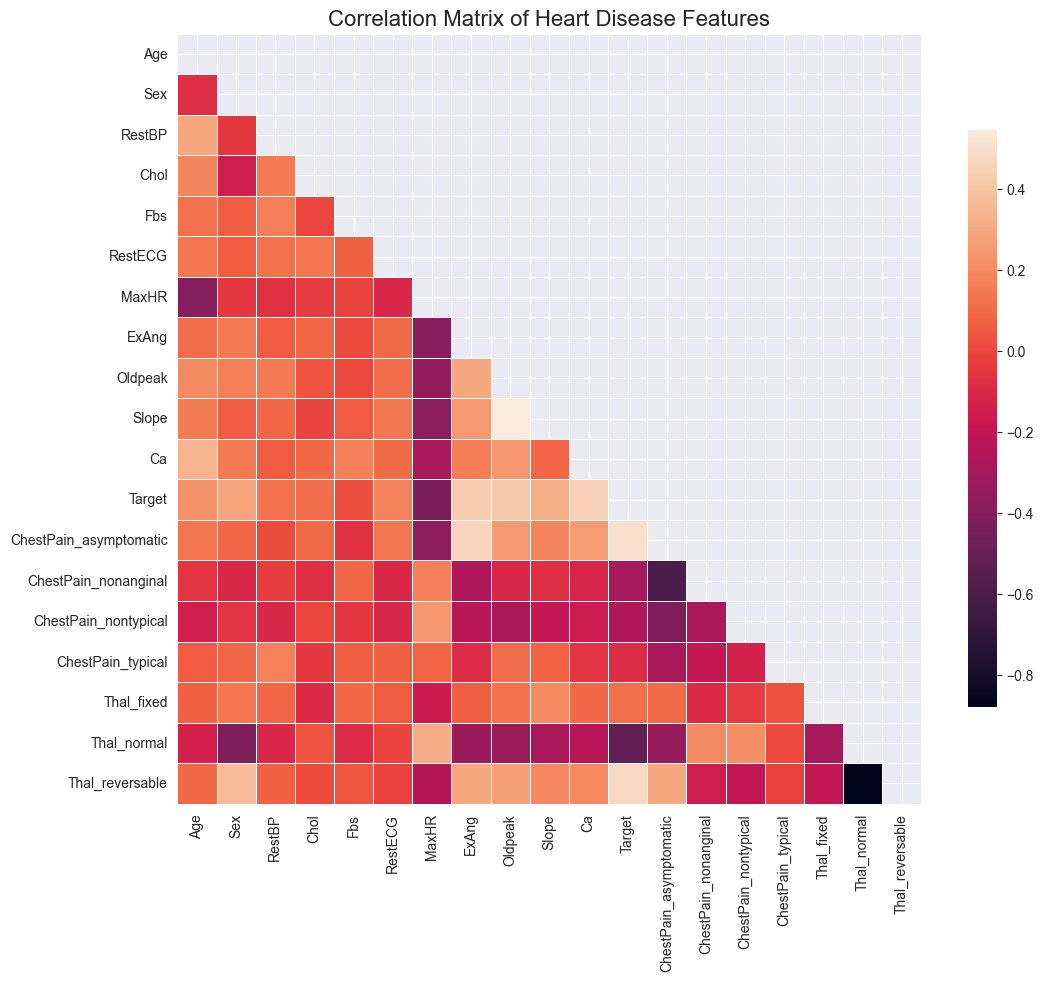

In [53]:
df['ChestPain'].unique()
df['ChestPain'].unique()
df_encoded = pd.get_dummies(df, columns=['ChestPain', 'Thal'])
co_mtx = df_encoded.corr(numeric_only=True)
mask = np.triu(np.ones_like(co_mtx, dtype=bool))
plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix of Heart Disease Features', fontsize=16)
sns.heatmap(co_mtx,mask=mask,fmt='.2f',linewidths=.5,annot_kws={"size": 10},
    cbar_kws={"shrink": .75})
plt.show()

* we used the sns library to make a heatmap that shows the correlation between the features,we masked the correlation matrix so the correlation dont get repeated, we see higher correlation between the features with darker cells with them.

## Part 4: Summary of Our Findings

* We can see from the heatmap that Excercise induced angina and ST depression have the highest correlation with heart disease
* We can see that number of major Vessels is positively correlated with disease
* Maximum HR is negatively associated with heart disease
* Chest pain type is associative, among people with disease more 3/4th report asymptomatic chest pain while only 5 percent report 'typical' chest pain.

* From our analysis, I hypothise that depression(OldPeak) and number of major vessels (Ca) are the most important feature for determining heart disease, since they  have the highest associations with disease.

## Model Building and Evaluation:

### Encoding:

* To be able to use data in models ,we need to make our data numerical and avoid text
* We will be Testing two methods of encoding, One-Hot encoding,which converts data into a binary format,
* Label encoding, which converts every category into a unique integer

#### One_Hot encoding:


In [54]:
columns_to_encode = ['ChestPain', 'Thal', 'RestECG', 'Slope']
df_one_hot=pd.get_dummies(df,columns=columns_to_encode,drop_first=True)

* To implement encoding, we first define the columns to be encoded in a list for readability
* We use the get_dummies method to implement the encoding.
* I predict that One-hot encoding will be highly effcetive becuase conversion to binary makes data easily understood by algrothims, which increases performance.
* The data looks like the following

In [58]:
print(df_one_hot)
df_one_hot.info()

     Age  Sex  RestBP  Chol  Fbs  MaxHR  ExAng  Oldpeak  Ca  Target  \
0     63    1     145   233    1    150      0      2.3   0       0   
1     67    1     160   286    0    108      1      1.5   3       1   
2     67    1     120   229    0    129      1      2.6   2       1   
3     37    1     130   250    0    187      0      3.5   0       0   
4     41    0     130   204    0    172      0      1.4   0       0   
..   ...  ...     ...   ...  ...    ...    ...      ...  ..     ...   
298   45    1     110   264    0    132      0      1.2   0       1   
299   68    1     144   193    1    141      0      3.4   2       1   
300   57    1     130   131    0    115      1      1.2   1       1   
301   57    0     130   236    0    174      0      0.0   1       1   
302   38    1     138   175    0    173      0      0.0   2       0   

     ChestPain_nonanginal  ChestPain_nontypical  ChestPain_typical  \
0                   False                 False               True   
1      

* as we can see from .info() that the data that was encoded has been turned into boolean, which is 0,1 in binary terms
* and we can see the 0 and 1 values in that data table

#### Label encoding:

In [56]:
from sklearn.preprocessing import LabelEncoder

df_label_encoded= df.copy()
le= LabelEncoder()
for col in columns_to_encode:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])

* The second method of encoding is LabelEncoding, which gives a numerical value (1,2,3....) for our categories
* it could be useful for nomical data,particularly smaller data, and we will test it for our data.
* Below is how the data looks after label encoding

In [57]:
print(df_label_encoded)
df_label_encoded.info()

     Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0     63    1          3     145   233    1        2    150      0      2.3   
1     67    1          0     160   286    0        2    108      1      1.5   
2     67    1          0     120   229    0        2    129      1      2.6   
3     37    1          1     130   250    0        0    187      0      3.5   
4     41    0          2     130   204    0        2    172      0      1.4   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
298   45    1          3     110   264    0        0    132      0      1.2   
299   68    1          0     144   193    1        0    141      0      3.4   
300   57    1          0     130   131    0        0    115      1      1.2   
301   57    0          2     130   236    0        2    174      0      0.0   
302   38    1          1     138   175    0        0    173      0      0.0   

     Slope  Ca  Thal  Target  
0        2   0     0

* We can see that encoded data has been turned into integer type using .info() method
* We can see that in the data table, where category labels are integers